In [1]:
import os
import subprocess
from sliceSpecs import slice_spec
%matplotlib inline

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [ ]:
%run train.py --restore_file best

In [ ]:
%run evaluate.py

In [2]:
#Test a songs genre
#Put the desired song in the song_test folder and run

# Clear all temporary data folder first
output_dir = "data/128x128_specs/tmp_specs"
if os.path.exists(output_dir):
    c1 = ["rm", "-r", "data/128x128_specs/tmp_specs/"]
    subprocess.call(c1)
    
fname = "test_songs/000190.wav"#path to song

# Convert to .wav first
if fname.endswith(".mp3"):
    command = ['ffmpeg', '-v', '0', '-i', fname, fname.split(".mp")[0]+ ".wav"]
    subprocess.call(command)
    fname = fname.split(".mp")[0]+ ".wav"
    
# Create a spectrogram using sox
dest = fname.split(".wa")[0] + ".png"
command = ['sox', fname, '-n', 'remix', '1','spectrogram', '-Y', '200', '-X', '50', '-m', '-r', '-o', dest]
subprocess.call(command)

#slice and save spectrograms
input_dir = "test_songs/"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
new_dest= dest.split("/")[-1]
slice_spec(new_dest, 128, input_dir, output_dir)

Creating the dataset...
- done.
Starting classification


This track is definitely Folk


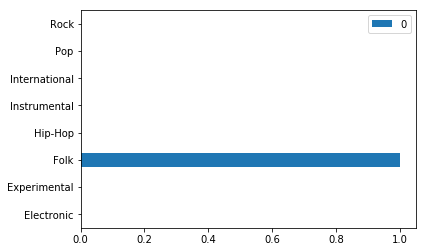

In [3]:
%run classify_genre.py